In [75]:
# Packages:

library(dplyr)
library(ggplot2)

# Data import:
economic_data <-arrow::read_csv_arrow("s3://ecb-hackathon-data-group07-x19s00/processed_data/economic_matrix.csv")

In [44]:
economic_data <- economic_data %>%
group_by(geo) %>%
mutate(employment_A_previous = lag(employment_A, order_by=year),
       employment_C_previous = lag(employment_C, order_by=year)) %>%
mutate(gross_value_added_scaled_A = gross_value_added_A/employment_A_previous, 
       gross_value_added_scaled_C = gross_value_added_C/employment_C_previous)

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


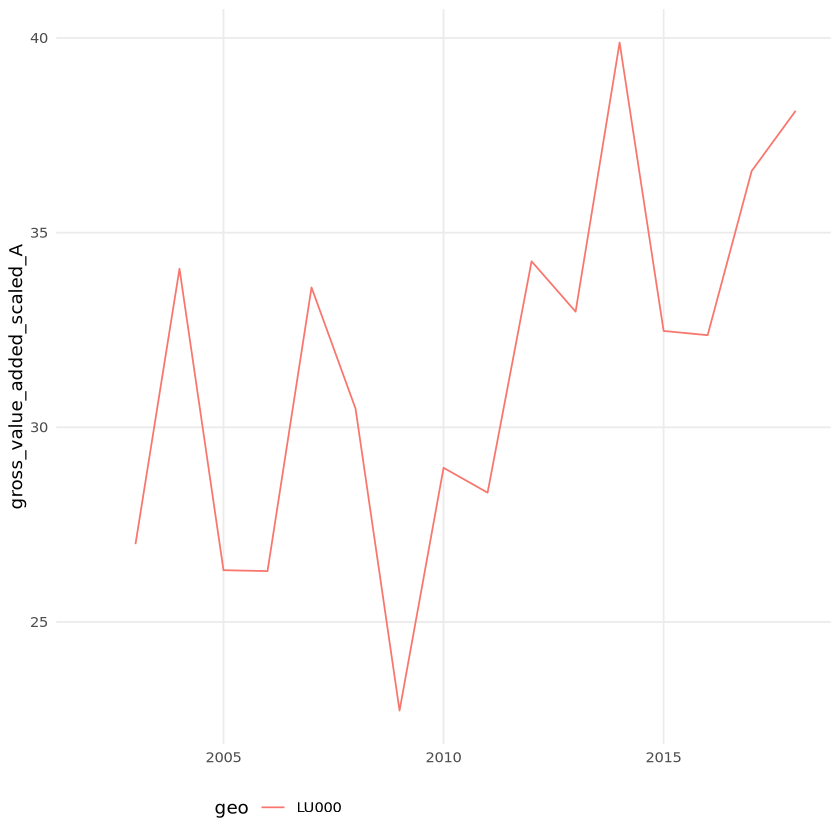

In [74]:
# Parameter choice
country_code <- 'LU'
index <- 'gross_value_added_scaled_A'

# Data filtering

economic_data_plot  <- economic_data %>% filter(substr(geo, 1, 2) == country_code)

# Check the data
# print(economic_data_plot %>% dplyr::select(c(geo, year, gross_value_added_scaled_A, employment_A_previous)))

# Plot the scaled GVA 
plot <- ggplot(economic_data_plot, aes(x=year, 
                           y=!!as.name(index),
                                      color = geo)) + # selected indicator
        geom_line() + 
        theme_minimal() + 
        theme(legend.position = 'bottom', 
              axis.title.x = element_blank(),
              panel.grid.minor = element_blank()) +
        guides(color=guide_legend(ncol=8))

plot